## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading the dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

### View the first five lines

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


There are a lot of variables/features here but the most interesting feature is the column Survived. This is the target variable for our ML model which we want to predict (1 or 0)

It has 2 values:

1 - Survived.

0 - No survived.

In [6]:
# checking data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Interpreting Data Information**

- We have 891 rows, any column that contains lesser number of rows has missing values.
- We have 12 columns.
- There are categorical features that have data type float64.
- There are numerical features that have data type object.

We can see quite a number of columns with missing values (Age, Cabin).

In [7]:
# statistical summary of numerical variables
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# summary statistics for categorical columns
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Univariate Analysis

In [9]:
# exploring the target variable
# checking for missing values
df_train['Survived'].isnull().sum()

0

In [10]:
# number of unique values
df_train['Survived'].nunique()

2

In [11]:
# frequency distribution
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# ratio of freq distribution of values
df_train['Survived'].value_counts() / len(df_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

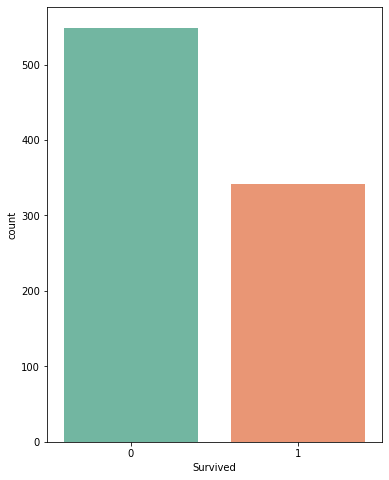

In [13]:
# visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Survived", data=df_train, palette="Set2")
plt.show()

Takeaways from Univariate Analysis :

1. We have 2 categories of values, 1 and 0.
2. We have far more negative(0) values than psitive(1) values.
3. 0 appears 61.6% of time, 1 appears 38.8% of time.

### Biravriate Analysis

Bivariate Analysis requires you to learn about relationships between pairs of variables.

First, segregating the categorical from the dataframe.

In [14]:
cat_vars = ['object']
cat_df = df_train.select_dtypes(include=cat_vars)
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


We have 5 categorical columns out of which:

Sex is a binary categorical features.

In [15]:
##counting the missing values in categorical features
cat_df.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

Next, we need to check for the number of labels each of these variables has. The number of labels a variable has defines its cardinality.

In [16]:
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Name has 891 labels
Sex has 2 labels
Ticket has 681 labels
Cabin has 148 labels
Embarked has 4 labels


In [17]:
cat_df = df_train.select_dtypes(include=cat_vars)
cat_df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [18]:
##printing missing value and labels in each column
print(cat_df.isnull().sum(), "=============")
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64 =============
Name has 891 labels
Sex has 2 labels
Ticket has 681 labels
Cabin has 148 labels
Embarked has 4 labels


In [19]:
##one-hot encoding Name column
pd.get_dummies(df_train['Name'], drop_first=True).head()

##printing the sum of 1s in each column
print(pd.get_dummies(df_train['Name'], drop_first=True).sum(axis=0))

Abbott, Mr. Rossmore Edward              1
Abbott, Mrs. Stanton (Rosa Hunt)         1
Abelson, Mr. Samuel                      1
Abelson, Mrs. Samuel (Hannah Wizosky)    1
Adahl, Mr. Mauritz Nils Martin           1
                                        ..
de Mulder, Mr. Theodore                  1
de Pelsmaeker, Mr. Alfons                1
del Carlo, Mr. Sebastiano                1
van Billiard, Mr. Austin Blyler          1
van Melkebeke, Mr. Philemon              1
Length: 890, dtype: int64


In [20]:

# Examining how many passengers survived
print(sum(df_train['Survived']),'passengers survived out of',len(df_train))

342 passengers survived out of 891


In [21]:
# One can look at several columns together
df_train[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


## Cleaning up the data

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The Cabin column is missing too many values to be useful (687). We have to drop it. Age and Embarked are useful so we'll use a technique to handle them**

In [23]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [24]:
print("The Cabin column is missing", sum(df_train['Cabin'].isna()), "values out of",len(df_train['Cabin']))

The Cabin column is missing 687 values out of 891


**Drop missing values**

In [25]:
# Drop missing values
df_train = df_train.drop('Cabin', axis=1)

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**For the age column, let's fill in the missing values with the median of all ages.**

In [28]:
df_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
# get the median of all ages
median_age = df_train.Age.median()
median_age

28.0

In [30]:
# fill in the missing values with the median of all ages
df_train.Age = df_train.Age.fillna(median_age)

In [31]:
df_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.**

In [32]:
df_train.Embarked = df_train.Embarked.fillna('U')

In [33]:
# check again empty values
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature engineering

### One-hot encoding

In [34]:
# check categorical columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
gender_columns = pd.get_dummies(df_train.Sex, prefix='Sex')
print(gender_columns)
embarked_columns = pd.get_dummies(df_train.Embarked, prefix='Embarked')
print(embarked_columns)

     Sex_female  Sex_male
0             0         1
1             1         0
2             1         0
3             1         0
4             0         1
..          ...       ...
886           0         1
887           1         0
888           1         0
889           0         1
890           0         1

[891 rows x 2 columns]
     Embarked_C  Embarked_Q  Embarked_S  Embarked_U
0             0           0           1           0
1             1           0           0           0
2             0           0           1           0
3             0           0           1           0
4             0           0           1           0
..          ...         ...         ...         ...
886           0           0           1           0
887           0           0           1           0
888           0           0           1           0
889           1           0           0           0
890           0           1           0           0

[891 rows x 4 columns]


In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
# concat dataset with new columns
df_train = pd.concat([df_train, gender_columns], axis=1)
df_train = pd.concat([df_train, embarked_columns], axis=1)

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0


In [39]:
# drop Sex and Embarked
df_train = df_train.drop(['Sex', 'Embarked'], axis=1)

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0


In [41]:
# Pclass has 3 class so it's categorical
categorized_pclass_columns = pd.get_dummies(df_train['Pclass'], prefix='Pclass')
df_train = pd.concat([df_train, categorized_pclass_columns], axis=1)
df_train = df_train.drop(['Pclass'], axis=1)

In [42]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,0,1


### Binning (numerical to categorical)

**The goal is to check the best possibility of survival when the passenger is between an age of groups**

In [43]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(df_train.Age, bins)
df_train['Categorized_age'] = categorized_age
df_train = df_train.drop(["Age"], axis=1)

In [44]:
# one-hot encoding
categorized_age_columns = pd.get_dummies(df_train['Categorized_age'], prefix='Categorized_age')
df_train = pd.concat([df_train, categorized_age_columns], axis=1)
df_train = df_train.drop(['Categorized_age'], axis=1)

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   Name                      891 non-null    object 
 3   SibSp                     891 non-null    int64  
 4   Parch                     891 non-null    int64  
 5   Ticket                    891 non-null    object 
 6   Fare                      891 non-null    float64
 7   Sex_female                891 non-null    uint8  
 8   Sex_male                  891 non-null    uint8  
 9   Embarked_C                891 non-null    uint8  
 10  Embarked_Q                891 non-null    uint8  
 11  Embarked_S                891 non-null    uint8  
 12  Embarked_U                891 non-null    uint8  
 13  Pclass_1                  891 non-null    uint8  
 14  Pclass_2  

### Feature selection

In [46]:
# we have to drop Name, Ticket because there are too many unique values
# we keep PassengerId for the submission
df_train = df_train.drop(['Name', 'Ticket'], axis=1)

In [47]:
df_train.head()

,PassengerId,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,1,0,7.2500,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,2,1,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,0,0,7.9250,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,4,1,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,8.0500,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   SibSp                     891 non-null    int64  
 3   Parch                     891 non-null    int64  
 4   Fare                      891 non-null    float64
 5   Sex_female                891 non-null    uint8  
 6   Sex_male                  891 non-null    uint8  
 7   Embarked_C                891 non-null    uint8  
 8   Embarked_Q                891 non-null    uint8  
 9   Embarked_S                891 non-null    uint8  
 10  Embarked_U                891 non-null    uint8  
 11  Pclass_1                  891 non-null    uint8  
 12  Pclass_2                  891 non-null    uint8  
 13  Pclass_3                  891 non-null    uint8  
 14  Categorize

## Training models

In [49]:
# separate the features from the labels
features = df_train.drop(["Survived"], axis=1)
labels = df_train["Survived"]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# 60% training, 20% validation, and 20% testing
# fix random_state to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [52]:
# we need to perform the operation twice
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

### Training different models

**Logistic regression**

**Decision tree**

**Naive Bayes**

**Support vector machine (SVM)**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

lr_model = LogisticRegression(max_iter=1000,solver='lbfgs')
lr_model.fit(features_train, labels_train)

LogisticRegression(max_iter=1000)

In [54]:
dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

DecisionTreeClassifier()

In [55]:
nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

GaussianNB()

In [56]:
svm_model = SVC()
svm_model.fit(features_train, labels_train)

SVC()

In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

RandomForestClassifier()

In [58]:
gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

GradientBoostingClassifier()

In [59]:
ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)

AdaBoostClassifier()

## Evaluating models

### Accuracy

In [60]:
print("Scores of the models")
print("Logistic regression:", lr_model.score(features_validation, labels_validation))
print("Decision tree:", dt_model.score(features_validation, labels_validation))
print("Naive Bayes:", nb_model.score(features_validation, labels_validation))
print("SVM:", svm_model.score(features_validation, labels_validation))
print("Random forest:", rf_model.score(features_validation, labels_validation))
print("Gradient boosting:", gb_model.score(features_validation, labels_validation))
print("AdaBoost:", ab_model.score(features_validation, labels_validation))

Scores of the models
Logistic regression: 0.7696629213483146
Decision tree: 0.7359550561797753
Naive Bayes: 0.7471910112359551
SVM: 0.6235955056179775
Random forest: 0.7865168539325843
Gradient boosting: 0.797752808988764
AdaBoost: 0.7584269662921348


**Gradient boosting is the winner with 80.0% of accuracy**

## Clean test dataset

**This is a file with more passengers on the Titanic, except it doesn’t have the Survived column.**
**Basically we redo the same operations that the training dataset, but we need to check the values to see if there are some differences**

In [61]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [62]:
# Check empty values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Cleaning data

In [63]:
# One Fare is messing, we're gonna replace it with the Fare's mean
fare_mean = df_test.Fare.mean()
fare_mean
df_test.Fare = df_test.Fare.fillna(fare_mean)

In [64]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [65]:
# Drop Cabin and fill Age with the median previously found
df_test = df_test.drop(['Cabin'], axis=1)
df_test.Age = df_test.Age.fillna(28.0)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Feature engineering

In [66]:
test_gender_columns = pd.get_dummies(df_test['Sex'], prefix='Sex')
test_embarked_columns = pd.get_dummies(df_test["Embarked"], prefix="Embarked")
df_test = pd.concat([df_test, test_gender_columns], axis=1)
df_test = pd.concat([df_test, test_embarked_columns], axis=1)
df_test = df_test.drop(['Sex', 'Embarked'], axis=1)

# the test data has no missing 'Embarked' fields. Therefore, the processed test data will not
# have an 'Embarked_Q' column. We need to artificially add one filled with zeros.
df_test['Embarked_U'] = pd.DataFrame([0 for i in range(len(df_test))])

test_categorized_pclass_columns = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
df_test = pd.concat([df_test, test_categorized_pclass_columns], axis=1)
df_test = df_test.drop(['Pclass'], axis=1)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
test_categorized_age = pd.cut(df_test['Age'], bins)
df_test['Categorized_age'] = categorized_age
df_test = df_test.drop(["Age"], axis=1)

test_cagegorized_age_columns = pd.get_dummies(df_test['Categorized_age'], prefix='Categorized_age')
df_test = pd.concat([df_test, test_cagegorized_age_columns], axis=1)
df_test = df_test.drop(['Categorized_age'], axis=1)

df_test = df_test.drop(['Name', 'Ticket'], axis=1)
df_test

,PassengerId,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,892,0,0,7.8292,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,893,1,0,7.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,894,0,0,9.6875,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,895,0,0,8.6625,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,896,1,1,12.2875,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
414,1306,0,0,108.9000,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,1307,0,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
416,1308,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               418 non-null    int64  
 1   SibSp                     418 non-null    int64  
 2   Parch                     418 non-null    int64  
 3   Fare                      418 non-null    float64
 4   Sex_female                418 non-null    uint8  
 5   Sex_male                  418 non-null    uint8  
 6   Embarked_C                418 non-null    uint8  
 7   Embarked_Q                418 non-null    uint8  
 8   Embarked_S                418 non-null    uint8  
 9   Embarked_U                418 non-null    int64  
 10  Pclass_1                  418 non-null    uint8  
 11  Pclass_2                  418 non-null    uint8  
 12  Pclass_3                  418 non-null    uint8  
 13  Categorized_age_(0, 10]   418 non-null    uint8  
 14  Categorize

**Check how many how many survivors were predicted by Gradient boosting model**

## Prepare submission file

In [68]:
# submission = gb_model.predict(df_test)
# test random forest to see if the score is better

submission = rf_model.predict(df_test)

In [69]:
test = pd.DataFrame({"PassengerId": df_test["PassengerId"].values,
                   "Survived": submission,
                  })

In [70]:
test.to_csv("submission.csv", index=False)